<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Downloading-dataset" data-toc-modified-id="Downloading-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Downloading dataset</a></span></li><li><span><a href="#Rating-words" data-toc-modified-id="Rating-words-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Rating words</a></span></li><li><span><a href="#Ploting-the-outputs" data-toc-modified-id="Ploting-the-outputs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ploting the outputs</a></span></li></ul></div>

# Looking in Fake News 
 
Messages over fake news or deep fake might be related to large amount of words that are scattered on social media as for example:


>*"false, feigned, fictitious, gossip, tattle, coloquial, junk, bogues, phony, concocted, invented, make, sham, soft, counterfeit,fabricated, forget, fraudulent, mock, simulated,artificial, blamey, authentic, genuine, real, sincere, true, original,truthful"*

*So our target is to find out if there is a high incidence of these words in the granted dataset.*<br>

**Anexo:** 
A litle sub program that rounds to seconds:

In [1]:
import datetime as dt

In [2]:
def round_seconds(timedelta):
    seconds= int(timedelta.total_seconds())#rounds to seconds
    rounded_timedelta= dt.timedelta(seconds=seconds)#tranforms to hours:minutes:seconds  
    return(rounded_timedelta)    

## Downloading dataset 
Extracting only the attribute **body** of every file: 

In [3]:
import io

In [4]:
years=[2017,2018]
messages=[[],[]]

In [5]:
months2017=[]
for month in range(1,13):
    if month < 10:
        months2017.append('0' + str(month))
    else:
        months2017.append(str(month))
months2018=['0'+str(month) for month in range(1,9)]
months=[months2017,months2018]

We would like to know the downloading time: 

In [6]:
print('DOWNLOADING TIME:')
initial_time = dt.datetime.now()
for indexy in range(len(years)):
    for month in months[indexy]:
        start_time= dt.datetime.now()
        adress="RC_{0}-".format(years[indexy]) + month + '.csv'
        file= io.open(file= "dataset\\" + adress,encoding= 'utf-8')
        lines= file.readlines()
        file.close()
        paragraph=[]
        for index in range(1,len(lines)):
            if '"' in lines[index].split(',')[1]:
                extract= lines[index].split('"')[1]
            else:
                extract= lines[index].split(',')[1]
            if '[removed]' != extract and '[deleted]' != extract:
                paragraph.append(extract)
        messages[indexy].append(paragraph) 
        end_time= dt.datetime.now()
        print(adress +':',round_seconds(end_time - start_time)) 
final_time= dt.datetime.now()
time= final_time-initial_time
print('\nTotal time:',round_seconds(time))
print('Avg time for file:',round_seconds(time/20))

DOWNLOADING TIME:
RC_2017-01.csv: 0:00:02
RC_2017-02.csv: 0:00:02
RC_2017-03.csv: 0:00:00
RC_2017-04.csv: 0:00:02
RC_2017-05.csv: 0:00:02
RC_2017-06.csv: 0:00:02
RC_2017-07.csv: 0:00:02
RC_2017-08.csv: 0:00:03
RC_2017-09.csv: 0:00:03
RC_2017-10.csv: 0:00:03
RC_2017-11.csv: 0:00:04
RC_2017-12.csv: 0:00:04
RC_2018-01.csv: 0:00:04
RC_2018-02.csv: 0:00:03
RC_2018-03.csv: 0:00:03
RC_2018-04.csv: 0:00:03
RC_2018-05.csv: 0:00:03
RC_2018-06.csv: 0:00:03
RC_2018-07.csv: 0:00:03
RC_2018-08.csv: 0:00:03

Total time: 0:01:06
Avg time for file: 0:00:03


Looking out if there are `[delete]` or `[removed]` texts by file:

In [7]:
for indexy in range(len(years)):
    for month in months[indexy]:
        file_name="RC_{0}-".format(years[indexy]) + month + '.csv:'
        deleted = '[deleted]' in messages[indexy][int(month)-1]
        removed = '[removed]' in messages[indexy][int(month)-1]
        print(file_name, deleted or removed)          

RC_2017-01.csv: False
RC_2017-02.csv: False
RC_2017-03.csv: False
RC_2017-04.csv: False
RC_2017-05.csv: False
RC_2017-06.csv: False
RC_2017-07.csv: False
RC_2017-08.csv: False
RC_2017-09.csv: False
RC_2017-10.csv: False
RC_2017-11.csv: False
RC_2017-12.csv: False
RC_2018-01.csv: False
RC_2018-02.csv: False
RC_2018-03.csv: False
RC_2018-04.csv: False
RC_2018-05.csv: False
RC_2018-06.csv: False
RC_2018-07.csv: False
RC_2018-08.csv: False


Last changing the leters that are in upper case to lower case:

In [8]:
print('TIMING:')
start= dt.datetime.now()
for indexy in range(len(years)):
    for month in months[indexy]:
        initial_time = dt.datetime.now()
        month_texts= messages[indexy][int(month)-1]
        for ind in range(len(month_texts)):
            month_texts[ind]= month_texts[ind].lower()
        end_time= dt.datetime.now()
        time= end_time-initial_time
        print('{0}-{1}:'.format(years[indexy],month),round_seconds(time))
end= dt.datetime.now()
time= end- start
print('Total time:',round_seconds(time))
print('Avg time for file:',round_seconds(time/20))

TIMING:
2017-01: 0:00:00
2017-02: 0:00:00
2017-03: 0:00:00
2017-04: 0:00:00
2017-05: 0:00:00
2017-06: 0:00:00
2017-07: 0:00:00
2017-08: 0:00:00
2017-09: 0:00:00
2017-10: 0:00:00
2017-11: 0:00:00
2017-12: 0:00:00
2018-01: 0:00:00
2018-02: 0:00:00
2018-03: 0:00:00
2018-04: 0:00:00
2018-05: 0:00:00
2018-06: 0:00:00
2018-07: 0:00:00
2018-08: 0:00:00
Total time: 0:00:06
Avg time for file: 0:00:00


## Rating words 

In [9]:
words=['false', 'feigned', 'fictitious', 'gossip', 'tattle', 'coloquial', 
       'junk','bogues', 'phony', 'concocted', 'invented', 'make', 'sham', 
       'soft','counterfeit','fabricated','forget', 'fraudulent', 'mock', 
       'simulated','artificial', 'blamey', 'authentic', 'genuine', 'real', 
       'sincere','true','original','truthful']

In [10]:
rates=[]
print('TIMING:')
start= dt.datetime.now()
for indexy in range(len(years)):
    for month in months[indexy]:
        initial_time = dt.datetime.now()
        counting=0
        monthly_texts= messages[indexy][int(month)-1]
        for ind in range(len(monthly_texts)):
            n=0
            for word in words:
                if word in monthly_texts[ind]:
                    break
                else:
                    n +=1
            if n != len(words):
                counting += 1
        rates.append(counting/len(monthly_texts))        
        end_time= dt.datetime.now()
        time= end_time-initial_time
        print('{0}-{1}:'.format(years[indexy],month),round_seconds(time))
end= dt.datetime.now()
time= end- start
print('Total time:',round_seconds(time))
print('Avg time for file:',round_seconds(time/20))

TIMING:
2017-01: 0:00:06
2017-02: 0:00:06
2017-03: 0:00:00
2017-04: 0:00:05
2017-05: 0:00:06
2017-06: 0:00:06
2017-07: 0:00:06
2017-08: 0:00:07
2017-09: 0:00:07
2017-10: 0:00:08
2017-11: 0:00:10
2017-12: 0:00:11
2018-01: 0:00:10
2018-02: 0:00:08
2018-03: 0:00:08
2018-04: 0:00:07
2018-05: 0:00:08
2018-06: 0:00:07
2018-07: 0:00:08
2018-08: 0:00:08
Total time: 0:02:30
Avg time for file: 0:00:07


## Ploting the outputs
Setting the month labels from Jan 17 to Aug 18: 

In [11]:
month_date=[]
for indexy in range(len(years)):
    for month in months[indexy]:
        date= dt.datetime(years[indexy],int(month),1)
        label= date.strftime('%b %y')
        month_date.append(label)

Plotting:

In [12]:
import matplotlib.pyplot as plt

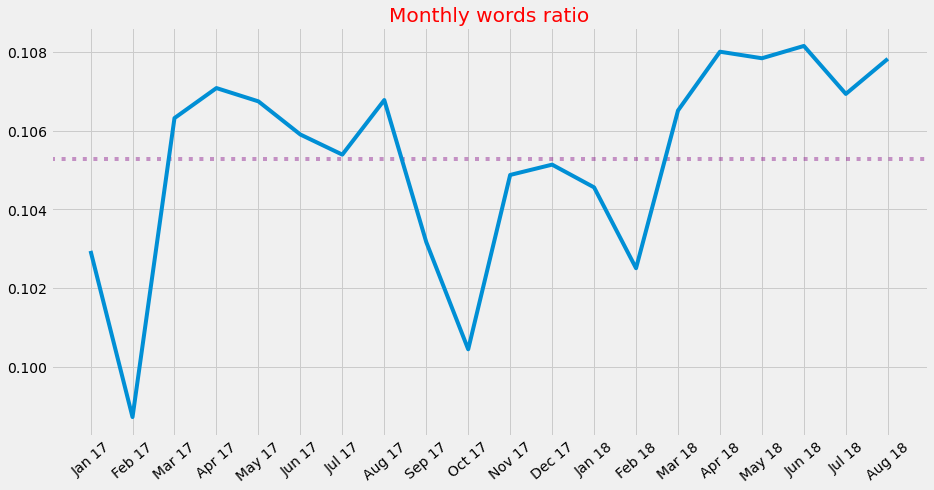

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,7))
plt.xticks(range(len(month_date)),month_date,rotation=40)
plt.axhline(y= sum(rates)/len(rates),xmin=0,xmax=20,color='purple',ls='dotted',alpha=0.4)
plt.plot(range(20),rates)
plt.title('Monthly words ratio',color= 'red', fontweight= 15)
plt.show()

- Practically one out of every ten is involved with the selected words.
- It seems that February is the month with the lowest ratio in every year and the annual words ratio looks higher and higher.  